# بسم الله الرحمن الرحيم

In [26]:
from utils import *
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt 


In [27]:
df = pd.read_csv("dataset/body_level_classification_train.csv")

In [28]:
df_original= cleaning_data(df).copy()

In [29]:
all_class_train,all_class_test=data_spliting(df_original,1/3)
## shuffling 
all_class_train = all_class_train.sample(frac=1.0, random_state=42)
all_class_test = all_class_test.sample(frac=1.0, random_state=42)

In [30]:
X_train=all_class_train.drop(["Body_Level"],axis=1).to_numpy()
Y_train=all_class_train["Body_Level"].to_numpy()
X_test =all_class_test.drop(["Body_Level"],axis=1).to_numpy()
Y_test =all_class_test["Body_Level"].to_numpy()

In [31]:
class_weights = all_class_train["Body_Level"].value_counts().to_dict()
total_num = sum(class_weights.values())
class_weights= { i : (total_num/(4* j )) for i ,j in zip(class_weights.keys(),class_weights.values())}

In [32]:
X_train, scaler= data_scaling(X_train)


In [33]:
X_val, X_test, Y_val, Y_test = train_test_split(X_test
                                                     , Y_test, test_size=0.5, random_state=42)

In [34]:
X_val = scaler.transform(X_val)
X_test=scaler.transform(X_test)

In [35]:

reg_model = LogisticRegression(random_state=42,max_iter=3000,class_weight=class_weights)
# Define the parameter grid to search over
param_grid = {
    'C': [0.001,0.01,0.1, 1, 10,100,200,300,400,500 ,600 ,700 ,800,900,1000,2000,
         3000,4000,5000,6000,7000,10000],
    'penalty': ['l2']
}


grid_search = GridSearchCV(estimator=reg_model, param_grid=param_grid,
                           cv=None,verbose=2)

grid_search.fit(X_train, Y_train)



# Access the cv_results_ dictionary
cv_results = grid_search.cv_results_

# Print the mean test scores for each hyperparameter combination
for mean_score, params in zip(cv_results['mean_test_score'], cv_results['params']):
    print(params['C'], mean_score)



Fitting 5 folds for each of 22 candidates, totalling 110 fits
[CV] END ................................C=0.001, penalty=l2; total time=   0.0s
[CV] END ................................C=0.001, penalty=l2; total time=   0.0s
[CV] END ................................C=0.001, penalty=l2; total time=   0.0s
[CV] END ................................C=0.001, penalty=l2; total time=   0.0s
[CV] END ................................C=0.001, penalty=l2; total time=   0.0s
[CV] END .................................C=0.01, penalty=l2; total time=   0.0s
[CV] END .................................C=0.01, penalty=l2; total time=   0.0s
[CV] END .................................C=0.01, penalty=l2; total time=   0.0s
[CV] END .................................C=0.01, penalty=l2; total time=   0.0s
[CV] END .................................C=0.01, penalty=l2; total time=   0.0s
[CV] END ..................................C=0.1, penalty=l2; total time=   0.0s
[CV] END ..................................C=0.

[CV] END .................................C=7000, penalty=l2; total time=   0.5s
[CV] END .................................C=7000, penalty=l2; total time=   0.4s
[CV] END .................................C=7000, penalty=l2; total time=   0.3s
[CV] END .................................C=7000, penalty=l2; total time=   0.5s
[CV] END ................................C=10000, penalty=l2; total time=   0.6s
[CV] END ................................C=10000, penalty=l2; total time=   0.5s
[CV] END ................................C=10000, penalty=l2; total time=   0.6s
[CV] END ................................C=10000, penalty=l2; total time=   0.4s
[CV] END ................................C=10000, penalty=l2; total time=   0.5s
0.001 0.646059580577347
0.01 0.7180279956929703
0.1 0.8407783417935702
1 0.9280008203866071
10 0.9574168076706149
100 0.9716146233912731
200 0.973645080244065
300 0.9716146233912731
400 0.9695892939547761
500 0.9695892939547761
600 0.9685791929446751
700 0.96857919294467

In [36]:
# Print the mean test scores for each hyperparameter combination
x_axis = []
y_axis = []
for mean_score, params in zip(cv_results['mean_test_score'], cv_results['params']):
    x_axis.append(params["C"])
    y_axis.append(mean_score)
    


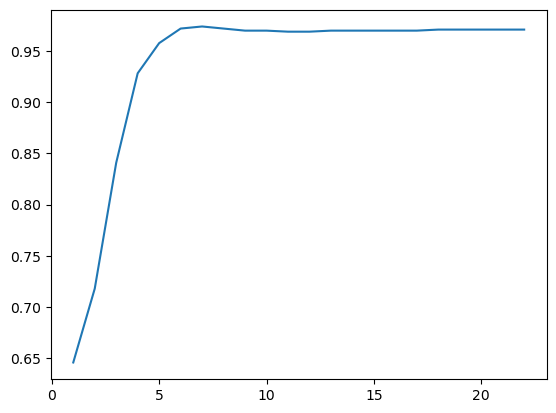

In [37]:
plt.plot(np.arange(1,len(x_axis)+1),y_axis)
plt.show()

In [38]:
accuracy, repo = test_model(grid_search.best_estimator_,X_train,Y_train ,axis=False)

In [39]:
accuracy

0.9979716024340771

In [40]:
print(repo) 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       127
           1       0.99      1.00      1.00       134
           2       1.00      1.00      1.00       271
           3       1.00      1.00      1.00       454

    accuracy                           1.00       986
   macro avg       1.00      1.00      1.00       986
weighted avg       1.00      1.00      1.00       986



In [41]:
accuracy, repo = test_model(grid_search.best_estimator_,X_val,Y_val ,axis=False)

In [42]:
accuracy

0.9795918367346939

In [43]:
print(repo) 

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        35
           1       0.94      0.97      0.95        31
           2       0.95      0.98      0.96        55
           3       1.00      0.98      0.99       124

    accuracy                           0.98       245
   macro avg       0.97      0.98      0.97       245
weighted avg       0.98      0.98      0.98       245



In [44]:
accuracy, repo = test_model(grid_search.best_estimator_,X_test,Y_test ,axis=False)

In [45]:
accuracy

0.9878048780487805

In [46]:
print(repo)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        28
           1       0.97      1.00      0.99        36
           2       0.99      0.97      0.98        80
           3       0.99      0.99      0.99       102

    accuracy                           0.99       246
   macro avg       0.99      0.99      0.99       246
weighted avg       0.99      0.99      0.99       246



# oversampling 

In [47]:
oversampled= over_sampling(all_class_train,sampling_ratio=0.5)

In [48]:
class_weights = oversampled["Body_Level"].value_counts().to_dict()
total_num = sum(class_weights.values())
class_weights= { i : (total_num/(4* j )) for i ,j in zip(class_weights.keys(),class_weights.values())}

In [49]:
class_weights

{3: 0.7252202643171806,
 2: 0.9571220930232558,
 1: 1.256679389312977,
 0: 1.2811284046692606}

In [50]:
X_train=oversampled.drop(["Body_Level"],axis=1).to_numpy()
Y_train=oversampled["Body_Level"].to_numpy()
X_test =all_class_test.drop(["Body_Level"],axis=1).to_numpy()
Y_test =all_class_test["Body_Level"].to_numpy()

In [51]:
X_train, scaler= data_scaling(X_train)
X_val, X_test, Y_val, Y_test = train_test_split(X_test
                                                     , Y_test, test_size=0.5, random_state=42)
X_val = scaler.transform(X_val)
X_test=scaler.transform(X_test)

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score



reg_model = LogisticRegression(random_state=42,max_iter=3000,class_weight=class_weights)
# Define the parameter grid to search over
param_grid = {
    'C': [0.001,0.01,0.1, 1, 10,100,200,300,400,500 ,600 ,700 ,800,900,1000,2000,
         3000,4000,5000,6000,7000,10000],
    'penalty': ['l2']
}


grid_search = GridSearchCV(estimator=reg_model, param_grid=param_grid, cv=None)

grid_search.fit(X_train, Y_train)



# Access the cv_results_ dictionary
cv_results = grid_search.cv_results_

# Print the mean test scores for each hyperparameter combination
for mean_score, params in zip(cv_results['mean_test_score'], cv_results['params']):
    print(params, mean_score)



{'C': 0.001, 'penalty': 'l2'} 0.6317144832353957
{'C': 0.01, 'penalty': 'l2'} 0.712953681299689
{'C': 0.1, 'penalty': 'l2'} 0.844336905173407
{'C': 1, 'penalty': 'l2'} 0.936959903214656
{'C': 10, 'penalty': 'l2'} 0.9688443369051732
{'C': 100, 'penalty': 'l2'} 0.9825210277681762
{'C': 200, 'penalty': 'l2'} 0.9832814840419404
{'C': 300, 'penalty': 'l2'} 0.9840390597995162
{'C': 400, 'penalty': 'l2'} 0.9840390597995162
{'C': 500, 'penalty': 'l2'} 0.9847995160732804
{'C': 600, 'penalty': 'l2'} 0.9840419403157046
{'C': 700, 'penalty': 'l2'} 0.9832814840419404
{'C': 800, 'penalty': 'l2'} 0.9832814840419404
{'C': 900, 'penalty': 'l2'} 0.9832814840419404
{'C': 1000, 'penalty': 'l2'} 0.9832814840419404
{'C': 2000, 'penalty': 'l2'} 0.9840419403157046
{'C': 3000, 'penalty': 'l2'} 0.9847995160732804
{'C': 4000, 'penalty': 'l2'} 0.9855599723470446
{'C': 5000, 'penalty': 'l2'} 0.9848023965894688
{'C': 6000, 'penalty': 'l2'} 0.9848023965894688
{'C': 7000, 'penalty': 'l2'} 0.9848023965894688
{'C': 100

In [55]:
test_model(grid_search.best_estimator_,X_train,Y_train ,axis=False)

(1.0,
 '              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00       257\n           1       1.00      1.00      1.00       262\n           2       1.00      1.00      1.00       344\n           3       1.00      1.00      1.00       454\n\n    accuracy                           1.00      1317\n   macro avg       1.00      1.00      1.00      1317\nweighted avg       1.00      1.00      1.00      1317\n')

In [56]:
accuracy1, repo1 = test_model(grid_search.best_estimator_,X_train,Y_train ,axis=False)
accuracy2, repo2 = test_model(grid_search.best_estimator_,X_val,Y_val ,axis=False)
accuracy3, repo3 = test_model(grid_search.best_estimator_,X_test,Y_test ,axis=False)

In [57]:
accuracy1

1.0

In [58]:
print(repo1) 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       257
           1       1.00      1.00      1.00       262
           2       1.00      1.00      1.00       344
           3       1.00      1.00      1.00       454

    accuracy                           1.00      1317
   macro avg       1.00      1.00      1.00      1317
weighted avg       1.00      1.00      1.00      1317



In [59]:
accuracy2

0.9836734693877551

In [60]:
print(repo2)

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        35
           1       0.97      0.94      0.95        31
           2       0.95      1.00      0.97        55
           3       1.00      0.99      1.00       124

    accuracy                           0.98       245
   macro avg       0.98      0.97      0.98       245
weighted avg       0.98      0.98      0.98       245



In [61]:
accuracy3

0.9878048780487805

In [62]:
print(repo3)

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        28
           1       0.97      0.97      0.97        36
           2       1.00      0.99      0.99        80
           3       0.99      1.00      1.00       102

    accuracy                           0.99       246
   macro avg       0.98      0.98      0.98       246
weighted avg       0.99      0.99      0.99       246

